<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import sys

sys.path.insert(0, os.path.relpath(".."))

In [2]:

from super_simulation.super_simulation_factory import SuperSimulationFactory
from transition_table import TransitionTable
from spark_policy import SparkPolicy
from shell_compartment import ShellCompartment
import pandas as pd
import numpy as np
from functools import partial
import yaml
%config Completer.use_jedi = False

/Users/pacopoler/.local/share/virtualenvs/stanford-decarceration-collective-VLMPOYfe/lib/python3.8/site-packages/google/auth/_default.py:81: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/Users/pacopoler/.local/share/virtualenvs/stanford-decarceration-collective-VLMPOYfe/lib/python3.8/site-packages/google/cloud/bigquery/table.py:1979: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  record_batch = self.to_arrow(
/Users/pacopoler/.local/share/virtualenvs/stanford-d

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default val

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default val

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default val

initialization time:  3.516486883163452


/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default val

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default val

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../fu

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../po

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../fu

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../fu

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../fu

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarni

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../po

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../population_simulation/population_simulation.py:188: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_population_data.groupby(population_df_sort_indices)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../shell_compartment.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: 

/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../full_compartment.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.outflows.loc[:, self.current_ts - 1] = pd.Series(outflow_dict, dtype=float)
/Users/pacopoler/Desktop/SDC/stanford-decarceration-collective/notebooks/../po

simulation_time:  6.6152589321136475


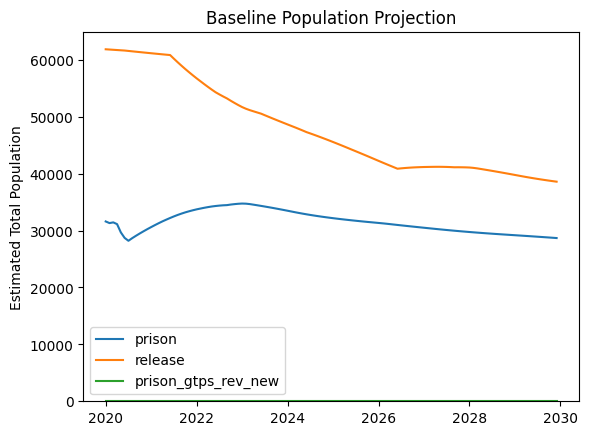

In [3]:
path_from_state_folder = "LA/HB_479/LA_HB479_model_inputs.yaml"
display_compartments = ["prison", "release", "prison_gtps_rev_new"]
test_sim = SuperSimulationFactory.build_super_simulation(
    "../state/" + path_from_state_folder
)
test_sim.simulate_baseline(display_compartments)

initialization time:  3.8147149085998535
initialization time:  3.580145835876465
simulation_time:  6.361394882202148
simulation_time:  6.400055170059204


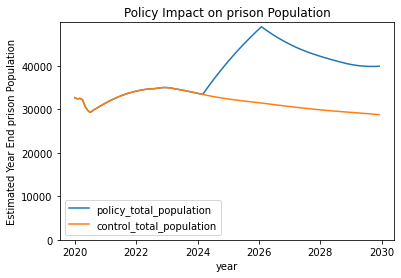

In [4]:
pd.set_option("display.max_rows", 500)
AVG_gtps_sentence = 64.08

new_transitions_data = pd.DataFrame(
    {
        "compartment": ["prison"] * 2,
        "outflow_to": ["release"] * 2,
        "age": ["x"] * 2,
        "total_population": [8.3, 100 - 8.3],
        "compartment_duration": [69, 0.85 * AVG_gtps_sentence],
    }
)


# Policy Option Methods


def abolish_parole(retroactive=False):
    return partial(
        TransitionTable.use_alternate_transitions_data,
        alternate_historical_transitions=new_transitions_data,
        retroactive=retroactive,
    )


policy_list_non_retroactive = [
    SparkPolicy(
        policy_fn=abolish_parole(),
        spark_compartment="prison",
        sub_population={"age": "x"},
        policy_ts=13,
    )
]

test_results = test_sim.simulate_policy(policy_list_non_retroactive, "prison")

In [5]:
simulation_tag = "LA_HB_479"
test_sim.upload_policy_simulation_results_to_bq(simulation_tag)

{'spending_diff':                         prison release release_full prison_gtps_rev_new
 year                                                                   
 2020.000000                0.0     0.0          0.0                 0.0
 2020.083333                0.0     0.0          0.0                 0.0
 2020.166667                0.0     0.0          0.0                 0.0
 2020.250000                0.0     0.0          0.0                 0.0
 2020.333333                0.0     0.0          0.0                 0.0
 2020.416667                0.0     0.0          0.0                 0.0
 2020.500000                0.0     0.0          0.0                 0.0
 2020.583333                0.0     0.0          0.0                 0.0
 2020.666667                0.0     0.0          0.0                 0.0
 2020.750000                0.0     0.0          0.0                 0.0
 2020.833333                0.0     0.0          0.0                 0.0
 2020.916667                0.0   